# Pymaceuticals Inc.
---

### Analysis

We have completed a study of Capomulin, our drug of interest, against our other treatment regimens. The observation was over a period of 45 days with 249 mice that had SCC tumors. All of the mice in the study started with the same tumor volume. 51% of the mouse population was male and 49% was female. The ages and sizes vary among the two sexes.

In the data collected, we noticed that one of the mice had duplicated information. The information collected for this mouse was dropped.

In the summary table, we measured the statistical comparisons of the tumor volumes across the different drug regimens.
- The data shows us that Capomulin and Ramicane appeared to be more effective than the other drug regimens as they had lower tumor volumes
- We noticed that the median volumes are relatively close to the mean. Therefore, we can assume that the distribution is somewhat normal.
- Having a lower variance likely indicates how consistent the results are for each drug. The data shows us that Capomulin and Ramicane had less variability at 24.947764 and 23.486704	respectively when compared to the other drugs. The standard deviation calculations also prove that Capomulin and Ramicane provide more consistent results with their lower values.
- Our SEM values were relatively small across the different drugs in the study. This would mean that our estimation of the mean tumor volumes for each drug regimen would be relatively precise.

We created another data study on the final tumor volumes for only Capomulin, Ramicane, Infubinol, and Ceftamin.
- The data shows us that at the last timepoints, Capomulin and Ramicane were most effective as they had smaller tumor volumes. The metastatic site data also proves that these two treatments were more effective as it limited the spread of the cancer cells.
- We had one outlier in the data showing us that Infubinol had one mouse had a very positive response to the treatment with the tumor volume reduced to 36.321346 mm3. However, considering that most of the data for Infubinol shows us a higher tumor volume for the rest of the mice, it would be good to investigate why this mouse's result was different from the rest of the group. It would also be worth looking into the accuracy to determine if it was a mistake or perhaps the measurement was not recorded properly.

We collected data on a sample mouse - Mouse ID l509 - which was treated with Capomulin to understand the pattern over its different timepoints. We noticed that there was a slight increase to the tumor volume and then a significant drop just before the 40 day timepoint before it starts increasing. It would be ideal to look into how the pattern continues over a longer duration to see whether the drug efficacy is consistent during a longer period or drops.

We noticed a relatively consistent positive linear correlation when comparing the mean tumor volume to the weight of the mouse. Mice with lower weight often resulted with lower tumor volumes and there is a gradual increase in the average tumor volume when compared to the weight of the mouse. 



 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results,mouse_metadata, how = 'left', on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = len(combined_df['Mouse ID'].unique())
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_count = combined_df.groupby(['Mouse ID', 'Timepoint']).size().reset_index(name='count')
duplicate_mice = duplicate_count[duplicate_count['count']>1]['Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_df.loc[combined_df['Mouse ID'] == 'g989']
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df['Mouse ID'] != "g989"]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
updated_mouse_count = len(clean_df['Mouse ID'].unique())
updated_mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_tumor = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_tumor = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dev_tumor = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_err_tumor = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({
    'Mean Tumor Volume' : mean_tumor,
    'Median Tumor Volume' : median_tumor,
    'Tumor Volume Variance':variance_tumor,
    'Tumor Volume Std. Dev.': std_dev_tumor,
    'Tumor Volume Std. Err.': sem_err_tumor
})

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_alt = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
summary_stats_alt

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoints')

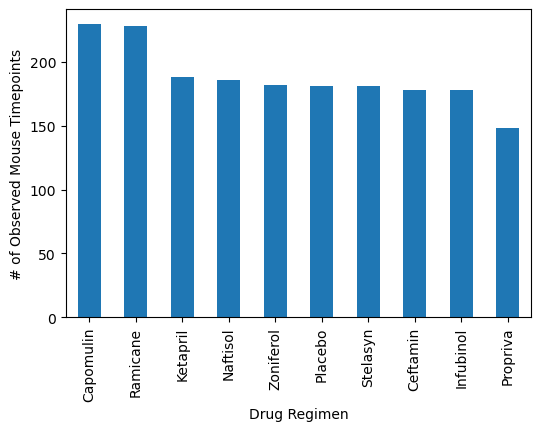

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_graph_values = clean_df.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False)
bar_graph_values.plot(kind='bar',figsize =(6,4))
plt.ylabel('# of Observed Mouse Timepoints')

Text(0, 0.5, '# of Observed Mouse Timepoints')

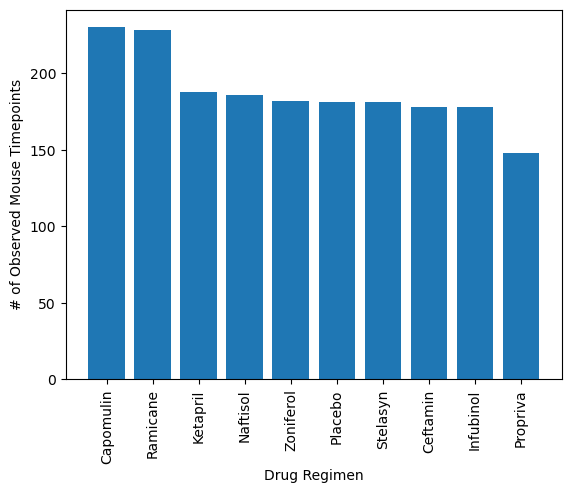

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(bar_graph_values.index,bar_graph_values.values)
plt.xticks(rotation =90)
plt.xlabel("Drug Regimen")
plt.ylabel('# of Observed Mouse Timepoints')

Text(0, 0.5, 'Sex')

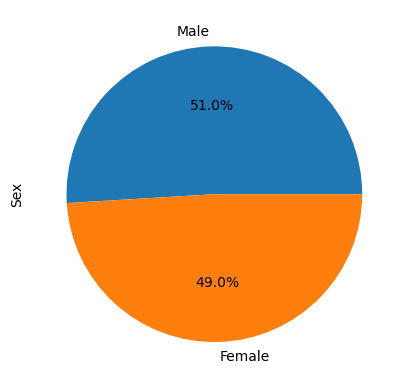

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_graph_values = clean_df['Sex'].value_counts()
pie_graph_values.plot(kind="pie",autopct='%1.1f%%')
plt.ylabel("Sex")

Text(0, 0.5, 'Sex')

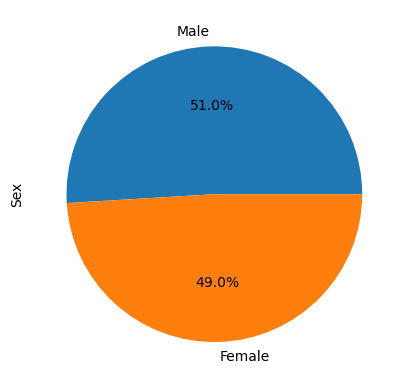

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie_graph_values,labels=pie_graph_values.index, autopct='%1.1f%%')
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = clean_df.groupby(['Mouse ID', 'Drug Regimen'])['Timepoint'].max().reset_index()

filtered_by_drug = last_timepoints.loc[(last_timepoints['Drug Regimen']=='Capomulin') |
                                    (last_timepoints['Drug Regimen']=='Ramicane') |
                                    (last_timepoints['Drug Regimen']=='Infubinol') |
                                    (last_timepoints['Drug Regimen']=='Ceftamin')
                                    ]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint = pd.merge(clean_df,filtered_by_drug, on=['Mouse ID', 'Drug Regimen', 'Timepoint'], how='right')
max_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and determine potential outliers for each treatment
for x in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = max_timepoint[max_timepoint['Drug Regimen'] == x]['Tumor Volume (mm3)']
    
    # add subset
    tumor_volume_data.append(subset)
   
    # Calculate Quartiles
    Q1 = subset.quantile(0.25)
    Q3 = subset.quantile(0.75)
    IQR = Q3-Q1
    
    # Determine outliers using upper and lower bounds
    l_bound = Q1-(1.5*IQR)
    u_bound = Q3+(1.5*IQR)
    
    # Display potential outliers
    outliers = subset[(subset < l_bound) | (subset > u_bound)]
    print(f"{x}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0.5, 0, 'Drug Regimen')

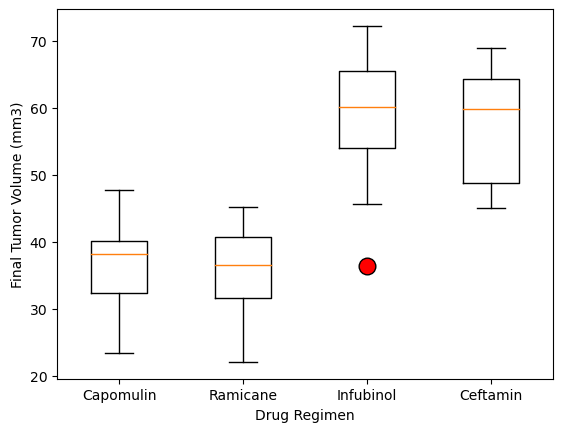

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_data, labels=treatments,flierprops=dict(markerfacecolor='red',markersize=12))
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

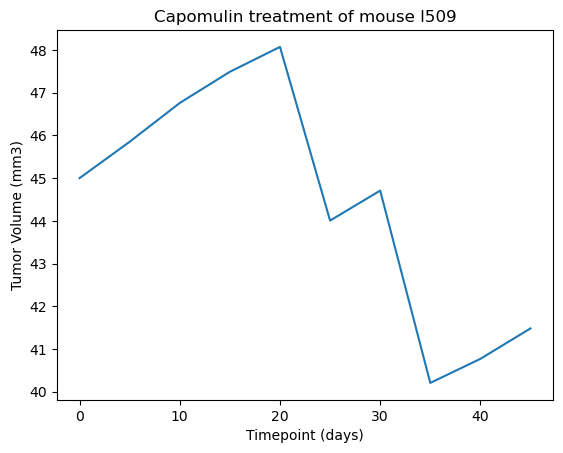

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509 = clean_df.loc[clean_df['Mouse ID'] == "l509"]
x_axis_mouse_l509 = mouse_l509['Timepoint'].values
y_axis_mouse_l509 = mouse_l509['Tumor Volume (mm3)'].values
plt.plot(x_axis_mouse_l509, y_axis_mouse_l509)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.title("Capomulin treatment of mouse l509")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

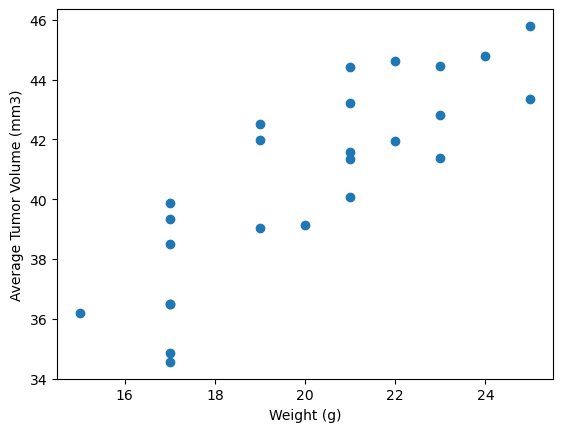

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
weight = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()
plt.scatter(weight, avg_tumor_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


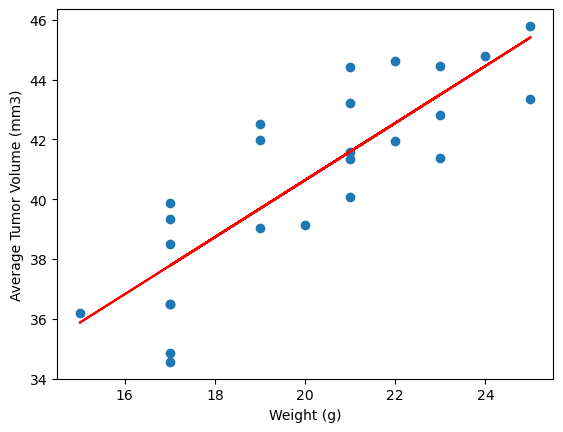

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
output = st.pearsonr(weight, avg_tumor_volume)
output = round(output[0],2)
regress = st.linregress(weight, avg_tumor_volume)
regressed_values = (regress[0]*weight) + regress[1]
plt.scatter(weight, avg_tumor_volume)
plt.plot(weight, regressed_values,color='r')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between mouse weight and the average tumor volume is {output}")